In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [4]:
dengue_features_train=pd.read_csv('dengue_features_train.csv')
dengue_labels_train= pd.read_csv('dengue_labels_train.csv')

In [5]:
# Join the training features and Labale to analysing them

new_train_set = pd.merge(dengue_features_train,dengue_labels_train, how='left', left_on =['city','year','weekofyear'], right_on=['city','year','weekofyear'])

In [6]:
new_train_set.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
count,1456.000000,1456.000000,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,...,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000,1456.000000
mean,2001.031593,26.503434,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,...,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360,24.675137
std,5.408314,15.019437,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,...,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314,43.596000
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,...,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000,0.000000
25%,1997.000000,13.750000,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,...,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000,5.000000
50%,2002.000000,26.500000,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,...,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000,12.000000
75%,2005.000000,39.250000,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,...,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000,28.000000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,...,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000,461.000000


In [7]:
# check the columns name
new_train_set.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases'],
      dtype='object')

In [8]:
corr_matrix = new_train_set.corr()
corr_matrix["total_cases"].sort_values(ascending=False)

total_cases                              1.000000
reanalysis_min_air_temp_k                0.325252
station_min_temp_c                       0.267109
reanalysis_air_temp_k                    0.264952
weekofyear                               0.216452
reanalysis_avg_temp_k                    0.151637
reanalysis_dew_point_temp_k              0.142531
reanalysis_specific_humidity_g_per_kg    0.129861
station_avg_temp_c                       0.116109
reanalysis_precip_amt_kg_per_m2         -0.010031
precipitation_amt_mm                    -0.038740
reanalysis_sat_precip_amt_mm            -0.038740
station_max_temp_c                      -0.039219
station_precip_mm                       -0.074374
reanalysis_relative_humidity_percent    -0.132452
ndvi_se                                 -0.168612
reanalysis_max_air_temp_k               -0.191345
ndvi_sw                                 -0.196461
ndvi_nw                                 -0.202235
station_diur_temp_rng_c                 -0.237844


In [12]:
# test_df=pd.read_csv('dengue_features_test.csv')

In [55]:
#remove duplcates, subset, keep, etc.
new_train_set.drop_duplicates()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1


In [36]:
# replacing sj with 1 and 


# dengue_features_train['city']=(dengue_features_train['city']=='sj').astype(int)

In [15]:
new_train_set.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

In [16]:
# Deal with NULL values
# I used avarage value for temperater feature to fill the NULL values

# replacing na values with previeus value  with limitation of 3 days 
new_train_set['reanalysis_air_temp_k'].fillna(method='ffill',limit=3,inplace=True)
new_train_set['reanalysis_tdtr_k'].fillna(method='ffill',limit=3,inplace=True)
new_train_set['station_diur_temp_rng_c'].fillna(method='ffill',limit=4,inplace=True)
new_train_set['ndvi_nw'].fillna(method='ffill',limit=3,inplace=True)
new_train_set['ndvi_se'].fillna(method='ffill',limit=3,inplace=True)
new_train_set['ndvi_sw'].fillna(method='ffill',limit=3,inplace=True)
new_train_set['ndvi_ne'].fillna(method='ffill',limit=3,inplace=True)


# replacing na values with average value
new_train_set['reanalysis_avg_temp_k'].fillna(new_train_set['reanalysis_avg_temp_k'].mean(),inplace=True)
new_train_set['reanalysis_dew_point_temp_k'].fillna(new_train_set['reanalysis_dew_point_temp_k'].mean(),inplace=True)
new_train_set['reanalysis_max_air_temp_k'].fillna(new_train_set['reanalysis_max_air_temp_k'].mean(),inplace=True)
new_train_set['reanalysis_min_air_temp_k'].fillna(new_train_set['reanalysis_min_air_temp_k'].mean(),inplace=True)
new_train_set['reanalysis_precip_amt_kg_per_m2'].fillna(new_train_set['reanalysis_precip_amt_kg_per_m2'].mean(),inplace=True)
new_train_set['reanalysis_sat_precip_amt_mm'].fillna(new_train_set['reanalysis_sat_precip_amt_mm'].mean(),inplace=True)
new_train_set['reanalysis_specific_humidity_g_per_kg'].fillna(new_train_set['reanalysis_specific_humidity_g_per_kg'].mean(),inplace=True)
new_train_set['station_avg_temp_c'].fillna(new_train_set['station_avg_temp_c'].mean(),inplace=True)
new_train_set['station_min_temp_c'].fillna(new_train_set['station_min_temp_c'].mean(),inplace=True)
new_train_set['station_max_temp_c'].fillna(new_train_set['station_max_temp_c'].mean(),inplace=True)
new_train_set['station_precip_mm'].fillna(new_train_set['station_precip_mm'].mean(),inplace=True)
new_train_set['precipitation_amt_mm'].fillna(new_train_set['precipitation_amt_mm'].mean(),inplace=True)
new_train_set['reanalysis_relative_humidity_percent'].fillna(new_train_set['reanalysis_relative_humidity_percent'].mean(),inplace=True)


# fill nul values with the next value
new_train_set['ndvi_nw'].fillna(method='ffill',limit=3,inplace=True)
new_train_set['ndvi_se'].fillna(method='ffill',limit=3,inplace=True)
new_train_set['ndvi_sw'].fillna(method='ffill',limit=3,inplace=True)
new_train_set['ndvi_ne'].fillna(method='ffill',limit=3,inplace=True)

In [17]:
new_train_set.isnull().sum()

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  9
ndvi_nw                                  9
ndvi_se                                  8
ndvi_sw                                  8
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  3
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

Text(0.5, 1, 'corr_matrix')

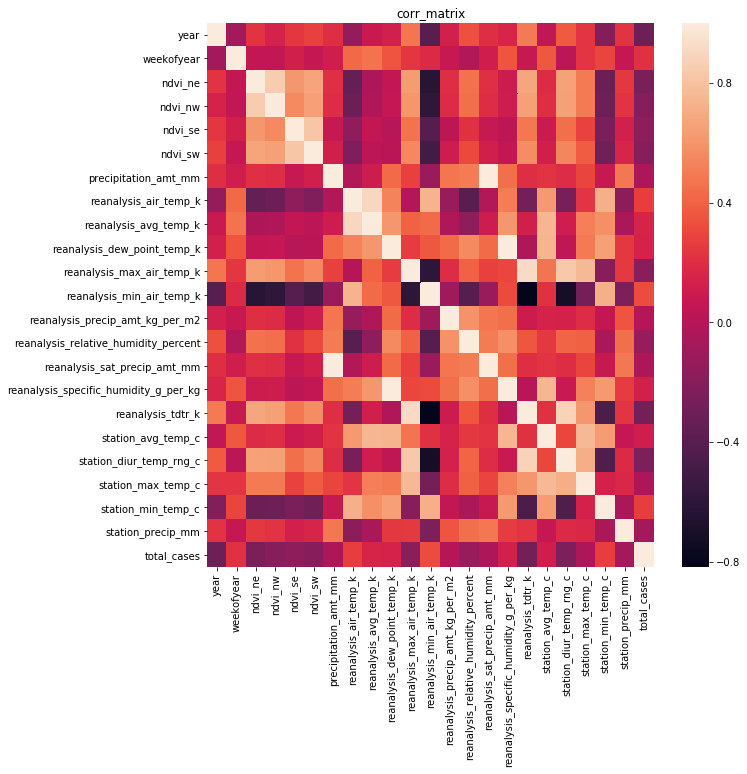

In [20]:
# plot san juan
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
sj_corr_heat = sns.heatmap(corr_matrix, ax=ax)
plt.title('corr_matrix')

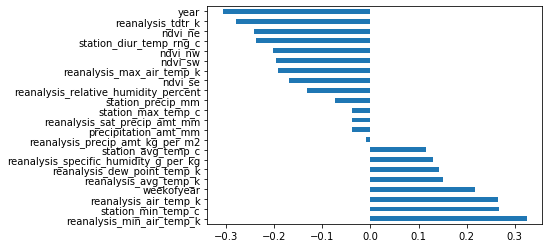

In [21]:
# San Juan
(corr_matrix
     .total_cases
     .drop('total_cases') # don't compare with myself
     .sort_values(ascending=False)
     .plot
     .barh())